In [10]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pdb
from Patch_ana import patch_pip
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
plt.style.use('classic')

% matplotlib inline
%load_ext autoreload
% autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
data= pd.read_csv('/data/Good data storage.csv')
data.head()

,File name,Age,Pip number,E-I,Reci,Artifact,IS100,Trial number before,Trial number after,Protocol,Elimi,Notes,Ptl_note
0,2016072704,27,3,0,0,0,1,"26,27,28,29","31,32,33,34,35",1,0,NaN,50Hz IE preonly
1,2017021501,30,3,0,0,0,2,"12,13","16,17",1,0,NaN,50Hz IE preonly
2,2016091403,30,2,0,0,0,1,"14,15","17,18",1,1,NaN,50Hz IE preonly
3,2017062202,24,1,0,0,0,1,"30,31,32","34,35",1,0,"No change, good data",50Hz IE preonly
4,2016072902,29,1,0,1,0,0,43,"45,46,47,48,49",1,0,NaN,50Hz IE preonly


In [3]:
data_asso_50Hz_reci = data[(data['Ptl_note']=='50Hz EI high freq')&(data['Reci']==1)&(data['Age']>25)]

In [4]:
data_asso_50Hz_reci

,File name,Age,Pip number,E-I,Reci,Artifact,IS100,Trial number before,Trial number after,Protocol,Elimi,Notes,Ptl_note
53,2016120503,29,2,1,1,0,2,"10,11","13,14,15,16,17",6,3,NaN,50Hz EI high freq
56,2016092901,27,2,1,1,0,1,"11,12","17,18,19",6,0,NaN,50Hz EI high freq
58,2016120202,26,1,1,1,0,2,17,"19,20,21,22,23",6,15,"Strong LTD, reduced PPR",50Hz EI high freq
60,2016120504,29,1,1,1,0,2,6,8,6,3,NaN,50Hz EI high freq
62,2017051001,26,2,1,1,1,2,"7,8","10,11,12",6,4,NaN,50Hz EI high freq
63,2017051002,26,2,1,1,0,1,"15,16",18,6,6,NaN,50Hz EI high freq


<Container object of 3 artists>

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


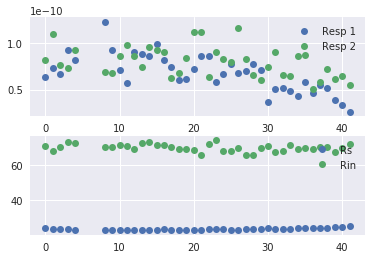

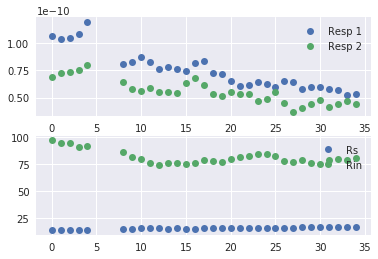

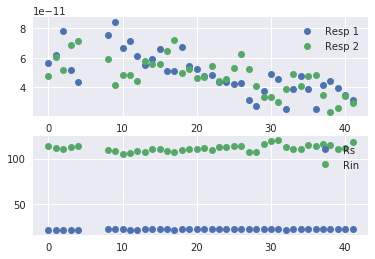

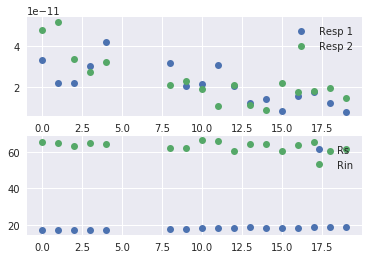

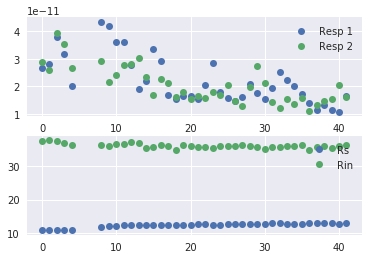

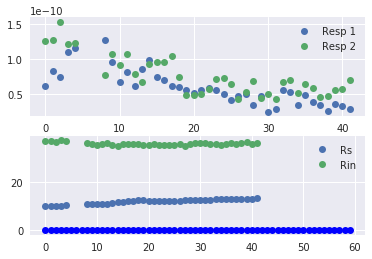

In [5]:
patch_pip.df_ana(data_asso_50Hz_reci,'/data/data_asso_50Hz_reci',end_ana=[50, 40, 50, 17, 50, 50])
asso_50Hz_reci = pd.read_pickle('/data/data_asso_50Hz_reci')
ave_ptl_mean, ave_ptl_ste = patch_pip.sample_plot(asso_50Hz_reci)
plt.errorbar(x=np.arange(len(ave_ptl_mean)), y=ave_ptl_mean, yerr=ave_ptl_ste, fmt='bo')

In [7]:
asso_50Hz_reci['Before'].index

Int64Index([53, 56, 58, 60, 62, 63], dtype='int64')

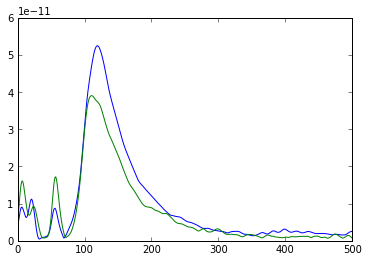

In [28]:
sample_id = 58
plt.plot(np.nanmean(np.vstack(asso_50Hz_reci['Before'].loc[sample_id]['trace_y1'])[:, :500], axis=0))
plt.plot(np.nanmean(np.vstack(asso_50Hz_reci['After'].loc[sample_id]['trace_y1'])[-5:,:500], axis=0))
plt.ylim([0, 6e-11])
with PdfPages('/data/Figure4_2.pdf') as pdf:
    pdf.savefig()

In [ ]:
elimi = np.array([50, 40, 50, 17, 50, 50])
elimi_sr = pd.Series(elimi, index=asso_50Hz_reci.index)
asso_50Hz_reci['elimi']=elimi_sr
# asso_50Hz_reci.to_pickle('/data/ana_asso_50Hz_reci')

In [ ]:
data_asso_50Hz_uni = data[(data['Ptl_note']=='50Hz EI high freq')&(data['Reci']==0)]

In [ ]:
data_asso_50Hz_uni

In [ ]:
patch_pip.df_ana(data_asso_50Hz_uni,'/data/data_asso_50Hz_uni')
asso_50Hz_uni = pd.read_pickle('/data/data_asso_50Hz_uni')
ave_ptl_mean, ave_ptl_ste = patch_pip.sample_plot(asso_50Hz_uni)
plt.errorbar(x=np.arange(len(ave_ptl_mean)), y=ave_ptl_mean, yerr=ave_ptl_ste, fmt='bo')